The dataset used in this notebook you can find on the link: https://archive.ics.uci.edu/ml/datasets/Lung+Cancer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
names = ['random_txt'] *57

In [31]:
lung_data = pd.read_csv('lung_data.txt', names=names)

In [32]:
lung_data

random_txt  random_txt  random_txt  random_txt  random_txt  random_txt  \
0            2           2           2           2           2           2   
1            2           2           2           2           2           2   
2            2           2           2           2           2           2   
3            2           2           2           2           2           2   
4            2           2           2           2           2           2   
5            2           2           2           2           2           2   
6            2           2           2           2           2           2   
7            2           2           2           2           2           2   
8            2           2           2           2           2           2   
9            2           2           2           2           2           2   
10           2           2           2           2           2           2   
11           1           1           1           1           1           1   
12           2           2           2           2           2           2   
13           2           2           2           2           2           2   
14           1           1           1           1           1           1   
15           2           2           2           2           2           2   
16           2           2           2           2           2           2   
17           2           2           2           2           2           2   
18           2           2           2           2           2           2   
19           1           1           1           1           1           1   
20           2           2           2           2           2           2   
21           2           2           2           2           2           2   
22           1           1           1           1           1           1   
23           1           1           1           1           1           1   
24           1           1           1           1           1           1   
25           2           2           2           2           2           2   
26           1           1           1           1           1           1   
27           1           1           1           1           1           1   
28           2           2           2           2           2           2   
29           1           1           1           1           1           1   
30           2           2           2           2           2           2   
31           2           2           2           2           2           2   

    random_txt  random_txt  random_txt  random_txt     ...      random_txt  \
0            2           2           2           2     ...               2   
1            2           2           2           2     ...               2   
2            2           2           2           2     ...               2   
3            2           2           2           2     ...               2   
4            2           2           2           2     ...               2   
5            2           2           2           2     ...               2   
6            2           2           2           2     ...               2   
7            2           2           2           2     ...               2   
8            2           2           2           2     ...               2   
9            2           2           2           2     ...               2   
10           2           2           2           2     ...               2   
11           1           1           1           1     ...               1   
12           2           2           2           2     ...               2   
13           2           2           2           2     ...               2   
14           1           1           1           1     ...               1   
15           2           2           2           2     ...               2   
16           2           2           2           2     ...               2   
17           2           

## Step 1. Preprocessing

###  Step 1.0 Features vs Labels(classes)

In [86]:
classes = lung_data.iloc[:, 0].values
features = lung_data.iloc[:, 1:].values

In [87]:
print(classes.shape)
print(features.shape)

(32,)
(32, 56)


### Step 1.1 Finding the best features

Because we have 56 different feautres, for each sample, we want to know what are those features which are the most relevant for our 
classification.

In [80]:
from sklearn.ensemble import ExtraTreesClassifier

In [81]:
etc = ExtraTreesClassifier(n_estimators=300)
etc.fit(features, classes)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [84]:
print(etc.feature_importances_)
indices = np.argsort(etc.feature_importances_)[::-1]

[ 0.02        0.03        0.01333333  0.00666667  0.01        0.00333333
  0.01333333  0.01666667  0.01333333  0.01666667  0.02666667  0.04333333
  0.02        0.03333333  0.01333333  0.01333333  0.01666667  0.01666667
  0.01666667  0.01        0.02        0.01666667  0.01666667  0.03
  0.02666667  0.01666667  0.01333333  0.01        0.01666667  0.01666667
  0.02333333  0.01666667  0.00333333  0.02666667  0.00666667  0.02
  0.00333333  0.02333333  0.02        0.01333333  0.04333333  0.01333333
  0.          0.01        0.02        0.03        0.01666667  0.01
  0.01333333  0.02        0.01333333  0.02666667  0.02333333  0.01666667
  0.02333333  0.02666667]


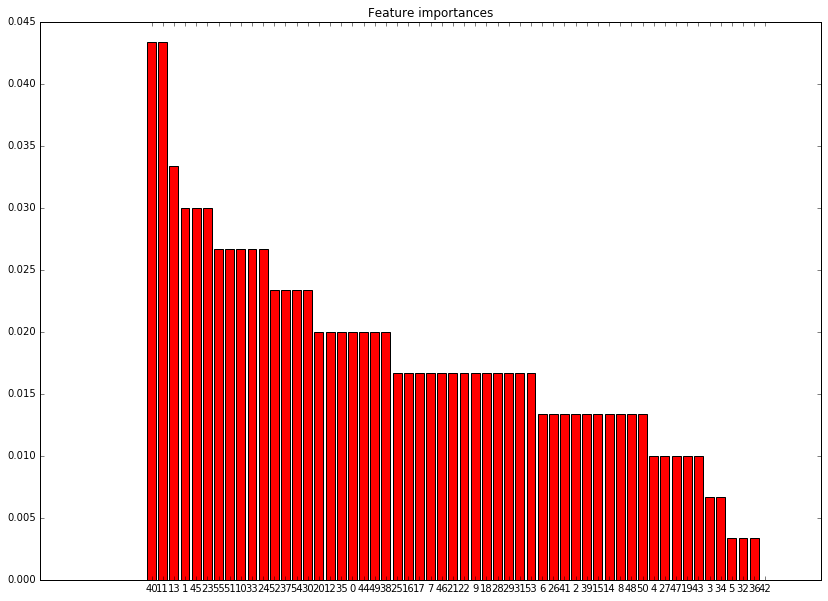

In [85]:
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w')
plt.title("Feature importances")
plt.bar(range(features.shape[1]), etc.feature_importances_[indices],
       color="r", align="center")
plt.xticks(range(features.shape[1]), indices)
plt.show()

### Step 1.2 Scaling data

In [38]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(np.float64(features))

### Step 1.3 Train and test split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features, classes, test_size=0.2)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_features, classes, test_size=0.2)

In [44]:
print("X_train shape --> {}".format(X_train.shape))
print("y_train shape --> {}".format(y_train.shape))
print("X_test shape --> {}".format(X_test.shape))
print("y_test shape --> {}".format(y_test.shape))

X_train shape --> (25, 56)
y_train shape --> (25,)
X_test shape --> (7, 56)
y_test shape --> (7,)


## Step 2 Predicting

### Step 2.1 K Nearest Neighbors

One of the algorithm tested by Hong and Young was KNN. They achieved 77% accuracy with that algorithm.

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### 2.1.1 Test on the unscaled data

In [46]:
knn_sklearn = KNeighborsClassifier()
knn_sklearn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [48]:
print("KNN algorithm on the unscalled data got: {}%".format(accuracy_score(y_test, knn_sklearn.predict(X_test))*100))

KNN algorithm on the unscalled data got: 100.0%


#### 2.1.2 Test on the scaled data

In [49]:
knn_sklearn_scaled = KNeighborsClassifier()
knn_sklearn_scaled.fit(X_train_scaled, y_train_scaled)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
print("KNN algorithm on the scalled data got: {}%".format(accuracy_score(y_test_scaled, knn_sklearn_scaled.predict(X_test_scaled))*100))

KNN algorithm on the scalled data got: 100.0%


This scores got me a bit. Lets test KNN with lower K.

In [55]:
knn_sklearn_lower = KNeighborsClassifier(n_neighbors=10)
knn_sklearn_lower.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [56]:
print("KNN algorithm on the unscalled data, k=3, got: {}%".format(accuracy_score(y_test, knn_sklearn_lower.predict(X_test))*100))

KNN algorithm on the unscalled data, k=3, got: 100.0%


### Step 2.2 SVM

Another classifier tested in their work was RDA.

In [57]:
from sklearn.svm import SVC

In [59]:
#Default setting for SVC
svclasifier = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None, random_state=None)

In [60]:
svclasifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
print("Default SVC algorithm on the unscalled data, got: {}%".format(accuracy_score(y_test, svclasifier.predict(X_test))*100))

Default SVC algorithm on the unscalled data, got: 100.0%


#### Step 2.2.1 Grid search for testing SVM

In [63]:
from sklearn.grid_search import GridSearchCV

In [67]:
params_data = {'C':[10, 100, 500, 1000], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

In [68]:
g_search = GridSearchCV(svclasifier, param_grid=params_data, verbose=10)

In [69]:
g_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=10, kernel=linear .............................................
[CV] .................... C=10, kernel=linear, score=1.000000 -   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .................... C=10, kernel=linear, score=1.000000 -   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .................... C=10, kernel=linear, score=1.000000 -   0.0s
[CV] C=10, kernel=poly ...............................................
[CV] ...................... C=10, kernel=poly, score=1.000000 -   0.0s
[CV] C=10, kernel=poly ...............................................
[CV] ...................... C=10, kernel=poly, score=1.000000 -   0.0s
[CV] C=10, kernel=poly ...............................................
[CV] ...................... C=10, kernel=poly, score=1.000000 -   0.0s
[CV] C=10, kernel=rbf ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [10, 100, 500, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [70]:
print(g_search.best_estimator_)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### Step 2.2.2 Best setup for SVM

In [71]:
set_svm = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
set_svm.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
print("Tuned - SVM algorithm on the unscalled data, got: {}%".format(accuracy_score(y_test, set_svm.predict(X_test))*100))

Tuned - SVM algorithm on the unscalled data, got: 100.0%


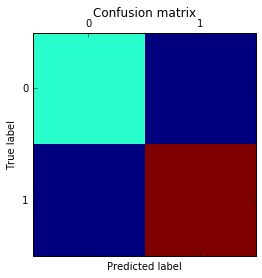

In [79]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
confusion_matrix = confusion_matrix(y_test, set_svm.predict(X_test))
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Step 3 Cross-Validation

The goal of this section is to test the best performing algorithm with cross validation and multiple different metrix (Precision, recall, accuracy...)

In [88]:
from sklearn.cross_validation import cross_val_score

In [94]:
svm_precision = cross_val_score(set_svm, X_train, y_train, cv=6, scoring='precision')
print('Precision of fine tuned SVM is: ', np.mean(svm_precision), svm_precision)

Precision of fine tuned SVM is:  1.0 [ 1.  1.  1.  1.  1.  1.]


In [93]:
svm_recall = cross_val_score(set_svm, X_train, y_train, cv=6, scoring='recall')
print('Recall of fine tuned SVM is: ', np.mean(svm_recall), svm_recall)

Recall of fine tuned SVM is:  1.0 [ 1.  1.  1.  1.  1.  1.]


In [95]:
svm_acc = cross_val_score(set_svm, X_train, y_train, cv=6, scoring='accuracy')
print('Accuracy of fine tuned SVM is: ', np.mean(svm_acc), svm_acc)

Accuracy of fine tuned SVM is:  1.0 [ 1.  1.  1.  1.  1.  1.]


In [97]:
svm_f1 = cross_val_score(set_svm, X_train, y_train, cv=6, scoring='f1')
print('F1 of fine tuned SVM is: ', np.mean(svm_f1), svm_f1)

F1 of fine tuned SVM is:  1.0 [ 1.  1.  1.  1.  1.  1.]
